In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Clean_Dataset.csv')

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243531,243531,Vistara,UK-928,Mumbai,Early_Morning,one,Evening,Chennai,Business,9.83,30.0,57453.0
243532,243532,Vistara,UK-928,Mumbai,Early_Morning,one,Night,Chennai,Business,13.75,30.0,57453.0
243533,243533,Vistara,UK-928,Mumbai,Early_Morning,one,Night,Chennai,Business,16.25,30.0,57453.0
243534,243534,Vistara,UK-910,Mumbai,Evening,one,Morning,Chennai,Business,16.33,30.0,57453.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243536 entries, 0 to 243535
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        243536 non-null  int64  
 1   airline           243536 non-null  object 
 2   flight            243536 non-null  object 
 3   source_city       243536 non-null  object 
 4   departure_time    243536 non-null  object 
 5   stops             243536 non-null  object 
 6   arrival_time      243536 non-null  object 
 7   destination_city  243536 non-null  object 
 8   class             243536 non-null  object 
 9   duration          243535 non-null  float64
 10  days_left         243535 non-null  float64
 11  price             243535 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 22.3+ MB


In [6]:
df.shape

(243536, 12)

In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,243536.000000,243535.000000,243535.000000,243535.000000
mean,121767.500000,11.748808,25.969142,13247.650190
std,70302.931916,7.243081,13.550941,17052.154174
min,0.000000,0.830000,1.000000,1105.000000
25%,60883.750000,6.330000,15.000000,4417.000000
50%,121767.500000,10.580000,26.000000,6181.000000
75%,182651.250000,15.670000,38.000000,11319.000000
max,243535.000000,49.830000,49.000000,117307.000000


In [8]:
df['airline'].value_counts()

,count
airline,
Vistara,90042
Air_India,62092
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [9]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,59592
Bangalore,35620
Kolkata,32874
Hyderabad,27936
Chennai,26171


In [10]:
df['destination_city'].value_counts()

,count
destination_city,
Delhi,45661
Mumbai,45413
Bangalore,42917
Kolkata,41884
Hyderabad,35278
Chennai,32383


In [11]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,73706
Evening,62517
Morning,49388
Afternoon,31564
Early_Morning,13624
Late_Night,12737


In [12]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,56921
Early_Morning,54545
Evening,53730
Afternoon,41152
Night,36020
Late_Night,1168


In [13]:
df['stops'].value_counts()

,count
stops,
one,198024
zero,32689
two_or_more,12823


In [14]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,36869
Bu,1


In [15]:
df['duration'].min()

0.83

In [16]:
df['duration'].max()

49.83

In [17]:
df['duration'].median()

10.58

# Preprocessing

we will drop the unnamed column.

and one hot encode airline,source_city, departure_time, stops, arrival_time, destination_city columns.

and binary encode class column.

In [18]:
df = df.drop('Unnamed: 0',axis = 1)
df = df.drop('flight',axis = 1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [19]:
df['stops'] = pd.factorize(df['stops'])[0]

In [20]:
df['stops'].unique()

array([0, 1, 2])

In [21]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1.0,5953.0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1.0,5953.0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1.0,5956.0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1.0,5955.0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...
243531,Vistara,Mumbai,Early_Morning,1,Evening,Chennai,1,9.83,30.0,57453.0
243532,Vistara,Mumbai,Early_Morning,1,Night,Chennai,1,13.75,30.0,57453.0
243533,Vistara,Mumbai,Early_Morning,1,Night,Chennai,1,16.25,30.0,57453.0
243534,Vistara,Mumbai,Evening,1,Morning,Chennai,1,16.33,30.0,57453.0


In [22]:
df = df.join(pd.get_dummies(df['airline'],prefix='airline').astype(int)).drop('airline',axis = 1)
df = df.join(pd.get_dummies(df['source_city'],prefix='source').astype(int)).drop('source_city',axis = 1)
df = df.join(pd.get_dummies(df['departure_time'],prefix='departure').astype(int)).drop('departure_time',axis = 1)
df = df.join(pd.get_dummies(df['arrival_time'],prefix='arrival').astype(int)).drop('arrival_time',axis = 1)
df = df.join(pd.get_dummies(df['destination_city'],prefix='dest').astype(int)).drop('destination_city',axis = 1)

In [23]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1.0,5953.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1.0,5953.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1.0,5956.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1.0,5955.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1.0,5955.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243531,1,1,9.83,30.0,57453.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
243532,1,1,13.75,30.0,57453.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
243533,1,1,16.25,30.0,57453.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
243534,1,1,16.33,30.0,57453.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243535 entries, 0 to 243534
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   stops                    243535 non-null  int64  
 1   class                    243535 non-null  int64  
 2   duration                 243535 non-null  float64
 3   days_left                243535 non-null  float64
 4   price                    243535 non-null  float64
 5   airline_AirAsia          243535 non-null  int64  
 6   airline_Air_India        243535 non-null  int64  
 7   airline_GO_FIRST         243535 non-null  int64  
 8   airline_Indigo           243535 non-null  int64  
 9   airline_SpiceJet         243535 non-null  int64  
 10  airline_Vistara          243535 non-null  int64  
 11  source_Bangalore         243535 non-null  int64  
 12  source_Chennai           243535 non-null  int64  
 13  source_Delhi             243535 non-null  int64  
 14  source_Hy

# Training Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

X,y = df.drop('price',axis = 1),df['price']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [40]:
reg = RandomForestRegressor(n_jobs = -1)

reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [37]:
df['price'].isna().sum()

0

In [41]:
reg.score(X_test,y_test)

0.9852537383553488

In [42]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg.predict(X_test)

print("R2: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9852537383553488
MAE:  818.5930401779335
MSE:  4402439.000605662
RMSE:  2098.198989754228


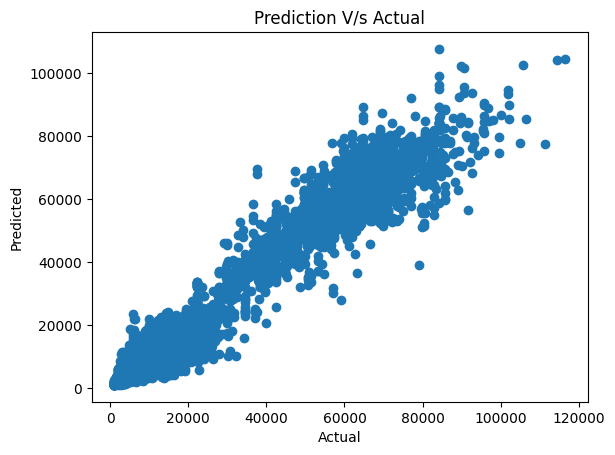

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Prediction V/s Actual")
plt.show()

In [45]:
df['price'].describe()

,price
count,243535.000000
mean,13247.650190
std,17052.154174
min,1105.000000
25%,4417.000000
50%,6181.000000
75%,11319.000000
max,117307.000000


In [47]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8594180656180372),
 ('duration', 0.06217188048198937),
 ('days_left', 0.028415852313934342),
 ('airline_Vistara', 0.009827568279734704),
 ('airline_Air_India', 0.007035039717698459),
 ('dest_Kolkata', 0.004448551372514163),
 ('stops', 0.0029393902760633047),
 ('source_Mumbai', 0.0022852512313675764),
 ('source_Delhi', 0.002178258462145766),
 ('dest_Hyderabad', 0.0020611103686202885),
 ('dest_Bangalore', 0.002048015922023649),
 ('dest_Chennai', 0.0019583918577848977),
 ('dest_Delhi', 0.00195590163633728),
 ('departure_Evening', 0.001265750812594246),
 ('airline_AirAsia', 0.00102871362745805),
 ('arrival_Afternoon', 0.0010279930457768017),
 ('departure_Morning', 0.0010252833895455012),
 ('dest_Mumbai', 0.0009611365407069659),
 ('arrival_Night', 0.0009545701186171217),
 ('departure_Early_Morning', 0.0009506720638859618),
 ('departure_Night', 0.0008329908503008646),
 ('arrival_Evening', 0.000816624710237709),
 ('arrival_Morning', 0.0007390051624223279),
 ('airline_Indigo', 0.0

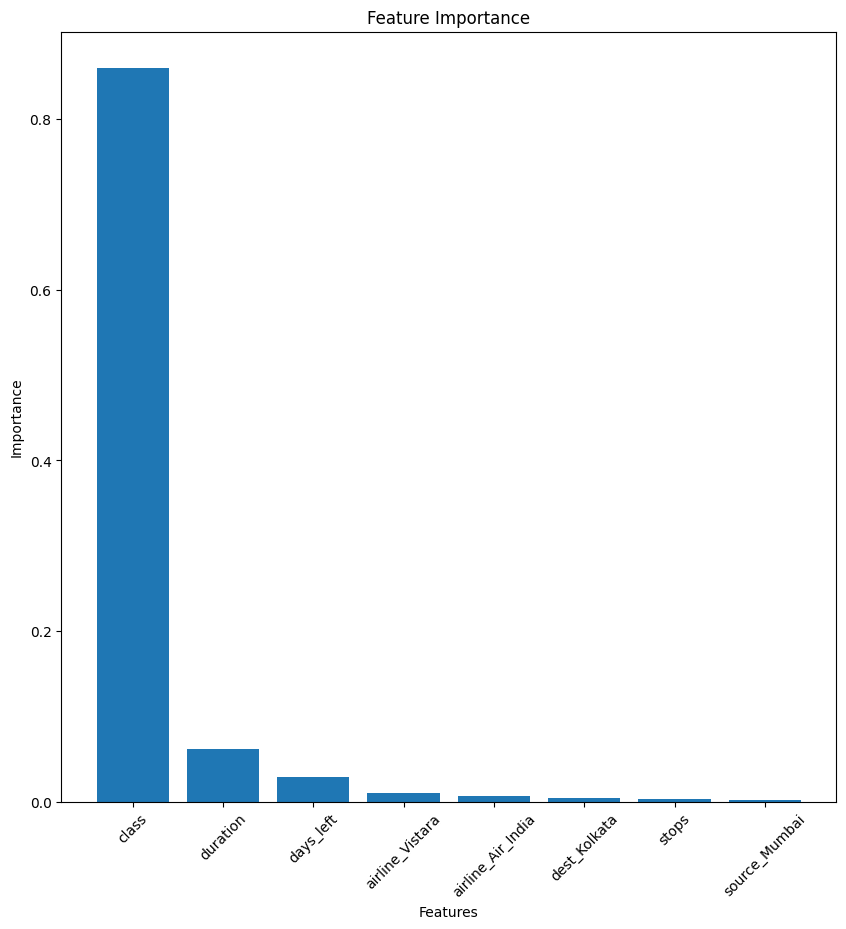

In [51]:
plt.figure(figsize=(10, 10))
plt.bar([x[0] for x in sorted_importances[:8]], [x[1] for x in sorted_importances[:8]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs = -1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid,cv =5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

para_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'auto', 'sqrt']
}
reg = RandomForestRegressor(n_jobs = -1)

random_search = RandomizedSearchCV(reg, para_dist, n_iter=2, cv=3,
                                   scoring = 'neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 

In [53]:
best_regressor.score(X_test,y_test)

0.9859608894395416

In [54]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_regressor.predict(X_test)

print("R2: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9859608894395416
MAE:  833.937480243245
MSE:  4191321.7976567843
RMSE:  2047.271793792115
